# DAI-101 Assignment
# Name: Krish Garg
# Enrollment No:23113085
# Batch: EP1
### Objective:
### Perform an explorative analysis of a dataset of your choice from the Kaggle library. The analysis should be a mix of calculating relevant statistical measures, plotting, and drawing applicable conclusions using both numerical and categorical variables. The analysis should be performed in two steps:
### 1.Univariate analysis
### 2.Multivariate analysis
## Selected Dataset: Laptop Data
### The selected dataset contains Data about more than 1200 Laptops along with the different attributes like RAM, Price, CPU, GPU, TypeName, Inches, etc. We will clean the dataset, analyse all the relevant attributes and draw appropriate conclusions.

## Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("laptopData.csv")

In [3]:
df.shape

(1303, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [6]:
df.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000




### We observe that "Unnamed : 0" is an unnecessary feature/column. Thus, we can drop it without affecting our data analysis.


In [7]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


### With this, we find that the number of missing values is uniform across the dataset ,i.e, entire rows are missing. As the number of missing values are comparatively smaller as compared to the total size, we can drop them.

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
print("Total missing values in data ",df.isnull().sum().sum())
print("After dropping missing values, the data shape is ",df.shape)

Total missing values in data  0
After dropping missing values, the data shape is  (1273, 11)


### We will now check for duplicates and we will drop them, given the number is not too large.

In [11]:
duplicates = df.duplicated() 
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 29


In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(1244, 11)

## Certain features such as 'Weight','Inches' and 'Ram' are supposed to be numerical attributes, but they unnecessarily have their unit like 'kg', 'GB' and also they have certain unusual values. We will deal with them. Firstly, cleaning 'Weight' feature.

In [14]:
df["Weight"]=df["Weight"].str.replace("kg","")
df["Weight"].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '2.5', '1.62', '1.91', '2.3', '1.35', '1.88',
       '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65', '2.77',
       '3.2', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4', '1.8', '1.9',
       '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21', '2.45',
       '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23', '2.16',
       '2.36', '7.2', '2.05', '1.32', '1.75', '0.97', '2.56', '1.48',
       '1.74', '1.1', '1.56', '2.03', '1.05', '5.4', '4.4', '1.90',
       '1.29', '2.0', '1.95', '2.06', '1.12', '3.49', '3.35', '2.23', '?',
       '2.9', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08', '4.3', '1.68',
       '1.41', '4.14', '2.18', '2.24', '2.67', '4.1', '2.14', '1.36',
       '2.25', '2.15', '2.19', '2.54', '3.42', '5.8', '1.28', '2.33',
       '1.45', '2.79', '8.23', '1.26', '1.84', '0.0002', '2.6', '2.26',
       '3.25', '1.59', '1.13', '1.42', '1.78', '1.10', '1.15', '1.27',


### '?',0.0002 and 11.1 are invalid entries, as these are not possible laptop weights. Therefore, we will deal with these values.

In [15]:
df[df["Weight"]=="?"]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [16]:
w=round(df[((df["Company"]=="Dell") & (df["TypeName"]=="Ultrabook")& (df["Inches"]=="13.3")) & (df["Weight"]!="?")]["Weight"].astype(float).mean(),2)
df.loc[208,"Weight"]=w
df.loc[208]

# We replace the weight of the unknown laptop with the mean of all the 'DELL' laptops.

Company                                   Dell
TypeName                             Ultrabook
Inches                                    13.3
ScreenResolution             Full HD 1920x1080
Cpu                 Intel Core i7 8550U 1.8GHz
Ram                                        8GB
Memory                               256GB SSD
Gpu                     Intel UHD Graphics 620
OpSys                               Windows 10
Weight                                    1.27
Price                                 77202.72
Name: 208, dtype: object

In [17]:
df[df["Weight"]=="0.0002"]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
349,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,AMD Radeon 530,Windows 10,0.0002,35324.64


In [18]:
df.loc[349,"Weight"]="1.27"
df.loc[349]

Company                                   Dell
TypeName                             Ultrabook
Inches                                    15.6
ScreenResolution             Full HD 1920x1080
Cpu                 Intel Core i5 8250U 1.6GHz
Ram                                        8GB
Memory                                 1TB HDD
Gpu                             AMD Radeon 530
OpSys                               Windows 10
Weight                                    1.27
Price                                 35324.64
Name: 349, dtype: object

In [19]:
df[df["Weight"]=="11.1"]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
630,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,11.1,101232.0


In [20]:
df.loc[630,"Weight"]="1.11"

### Converting Weight column to float

In [21]:
df["Weight"]=df["Weight"].astype(float)
df["Weight"].dtypes

dtype('float64')

### Now, cleaning the 'Inches' column.

In [22]:
df["Inches"].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [23]:
df[df["Inches"]=="?"]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.24


In [24]:
df.loc[476,"Inches"]="15.6"

# 15.6 is the standard screen size for Dell Workstation.

In [25]:
df["Inches"]=df["Inches"].astype(float)


### Cleaning the RAM Column

In [26]:
df["Ram"]=df["Ram"].str.replace("GB","").astype(int)
df["Ram"].dtypes

dtype('int64')

### CPU and GPU are features which contain multiple attributes in them. So we will now split them into their respective sub-parts (like CPU Speed, Name, Brand and GPU Brand, Name) by creating new columns.

In [27]:
df["CPU_Speed"]=df["Cpu"].str.rsplit(" ",n=1,expand=True)[1].str.replace("GHz","").astype(float)


In [28]:
df["CPU_Name"]=df["Cpu"].str.rsplit(" ",n=1,expand=True)[0]

In [29]:
df["CPU_Brand"]=df["CPU_Name"].apply(lambda x: "AMD" if "AMD" in x else ("Intel" if "Intel" in x else x))

In [30]:
df["GPU_Brand"]=df["Gpu"].str.split(" ",n=1,expand=True)[0]
df["GPU_Name"]=df["Gpu"].str.split(" ",n=1,expand=True)[1]

# Univariate Analysis

### Now that the code is cleaned, it is now ready for analysis. First we will perform univariate analysis using various features in the given dataset. As the target feature is 'Price' we will mostly analyse the variations and distribution in the laptop prices. Before that we will analyse the other attributes.

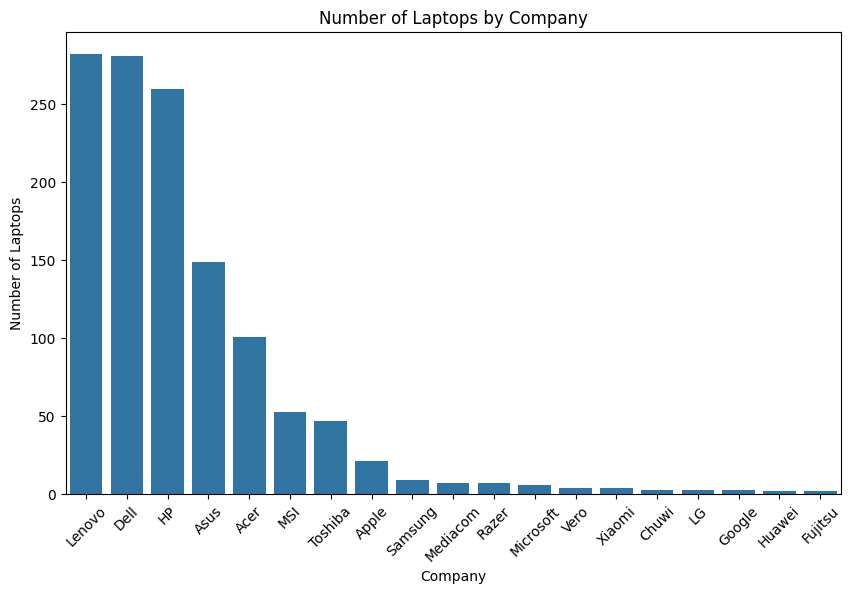

In [31]:
plt.figure(figsize=(10, 6))


sns.countplot(x='Company', data=df, order=df['Company'].value_counts().index)


plt.xlabel('Company')
plt.ylabel('Number of Laptops')
plt.title('Number of Laptops by Company')

plt.xticks(rotation=45)


plt.show()

### In this dataset, Lenovo, Dell and HP have the highest number of laptops listed. This could be due to wide range of products or better customer service provided by them.

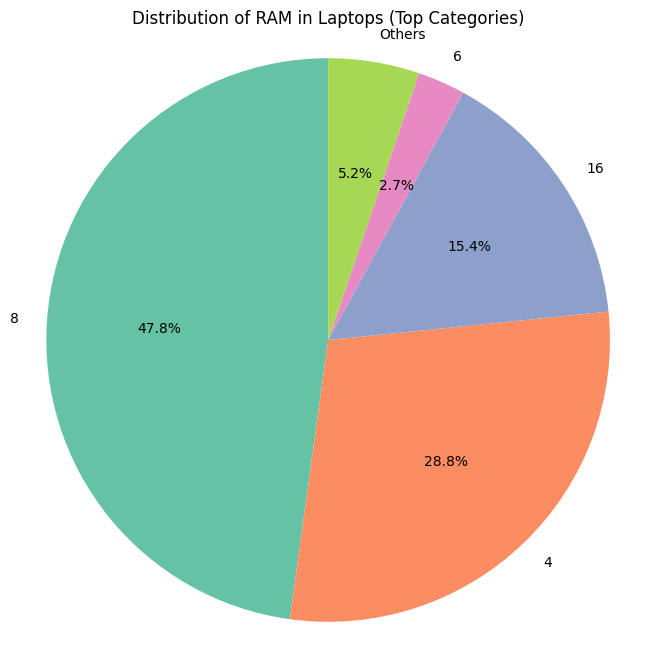

In [32]:
top_n = 4


ram_counts = df['Ram'].value_counts()


ram_counts_mod = ram_counts.nlargest(top_n)
ram_counts_mod['Others'] = ram_counts[~ram_counts.index.isin(ram_counts_mod.index)].sum()


plt.figure(figsize=(8, 8))
plt.pie(ram_counts_mod, labels=ram_counts_mod.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)

plt.axis('equal')
plt.title('Distribution of RAM in Laptops (Top Categories)')


plt.show()


### After drawing a pie chart for all the RAM specifications of the laptops, it is observed that Laptops with 8 GB Ram are most common, thus preferred by most customers. This is followed by 4 GB RAM and 16 GB RAM. Other unusual RAM capacities are included in the Others section.

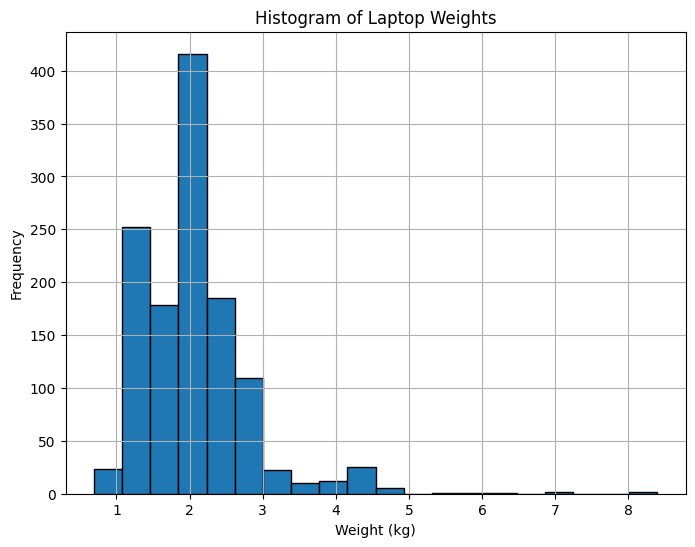

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(df['Weight'], bins=20, edgecolor='black')  


plt.title('Histogram of Laptop Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)


plt.show()

### The above histogram shows that laptops with weight around 2 kg are most common as consumers find them more convenient. The histogram is somewhat right-skewed as more heavy laptops seldom exist.

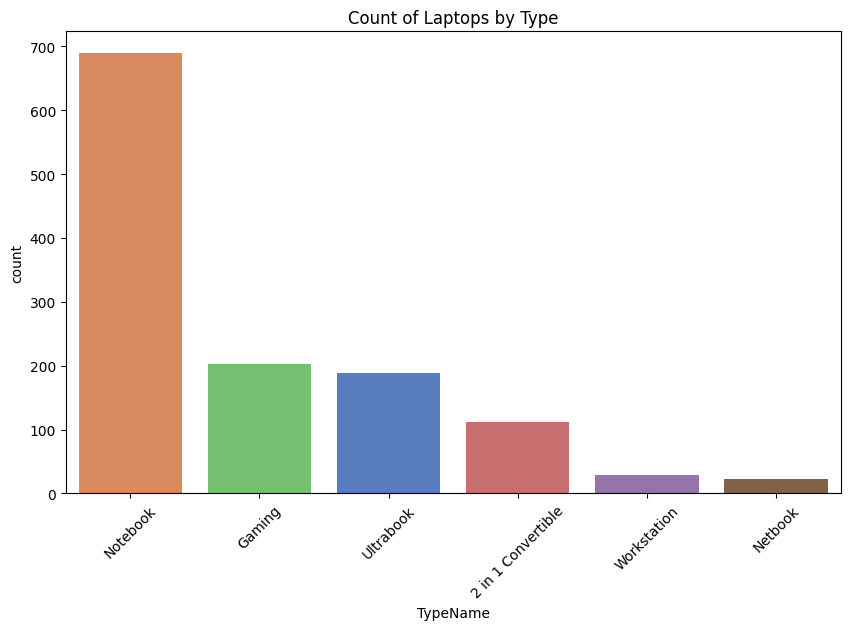

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TypeName', data=df, palette='muted', order=df['TypeName'].value_counts().index, hue = 'TypeName')
plt.title('Count of Laptops by Type')
plt.xticks(rotation=45)
plt.show()

### 'Notebook' is the most common laptop type by a great margin. This may be due to the price, and specifications of the laptop, which may be preferred by consumers.

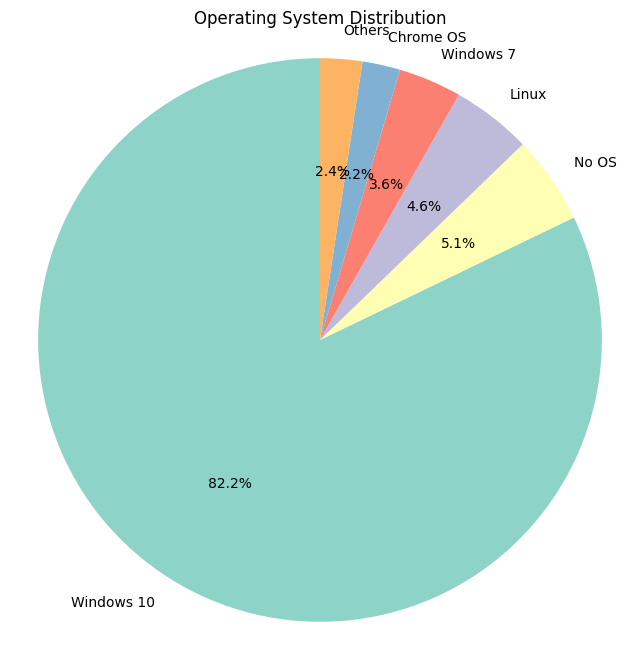

In [35]:
threshold = 25

opsys_counts = df['OpSys'].value_counts()

opsys_counts_mod = opsys_counts[opsys_counts >= threshold]
opsys_counts_mod['Others'] = opsys_counts[opsys_counts < threshold].sum()

plt.figure(figsize=(8, 8))
plt.pie(opsys_counts_mod, labels=opsys_counts_mod.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

plt.axis('equal')
plt.title('Operating System Distribution')

plt.show()

### 'Windows 10' is the most common operating system present in laptops

Text(0.5, 1.0, 'Distribution of Laptop Price ')

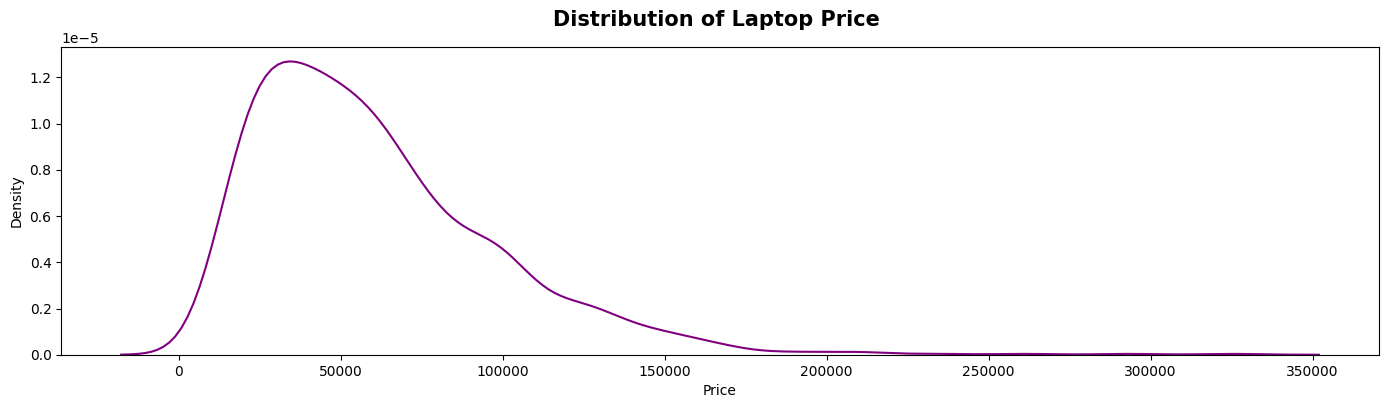

In [36]:
plt.figure(figsize=(17,4))

sns.kdeplot(df["Price"],color="purple")
plt.title("Distribution of Laptop Price ",fontweight="black",size=15, pad=15)

### The above KDE plot shows that the distribution of price is right skewed, which means there are fewer laptops which are expensive according to this dataset.
### Also, most of the laptops are priced around Rs.50000.

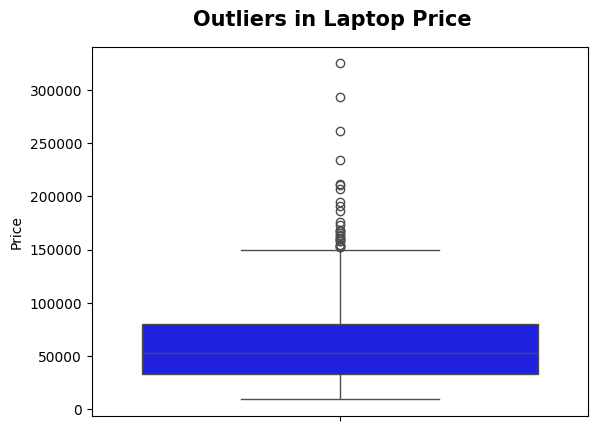

In [37]:
sns.boxplot(df["Price"],color="blue")
plt.title("Outliers in Laptop Price  ",fontweight="black",size=15, pad=15);

### We observe that the presence of outliers in "Price" is significant. As the number is large, it is not feasible to remove the outliers using IQR method. Therefore, for any further analysis, we will consider the median price instead of the mean, as the median is more robust to changes due to outliers.

In [38]:
df["Price"].agg(["min","max","median"]).to_frame()

,Price
min,9270.72
max,324954.72
median,52693.92


# Multivariate Analysis
### Now we will perform bivariate/multivariate analysis using various features that may (or may not be) related to our target attribute i.e, Price.

In [39]:
df.groupby(["Company"])["Price"].agg(["min","max","mean"])

,min,max,mean
Company,,,
Acer,9270.7200,138474.720,33750.986186
Apple,47895.5232,152274.240,83340.499886
Asus,10602.7200,211788.000,60310.535581
Chuwi,13053.0672,23922.720,16745.726400
Dell,14646.6720,194972.832,63963.889520
Fujitsu,34578.7200,42570.720,38574.720000
Google,67932.0000,117162.720,89386.080000
HP,11135.5200,233845.920,57910.511520
Huawei,71874.7200,79866.720,75870.720000


### Now that we have collected data about prices for all the companies, we will now plot a barplot for Top 5 Most and Least Expensive Laptop Companies.

In [40]:
top_5=df.groupby(["Company"])["Price"].mean().sort_values(ascending=False).head(5)
bottom_5=df.groupby(["Company"])["Price"].mean().sort_values(ascending=False).tail(5)

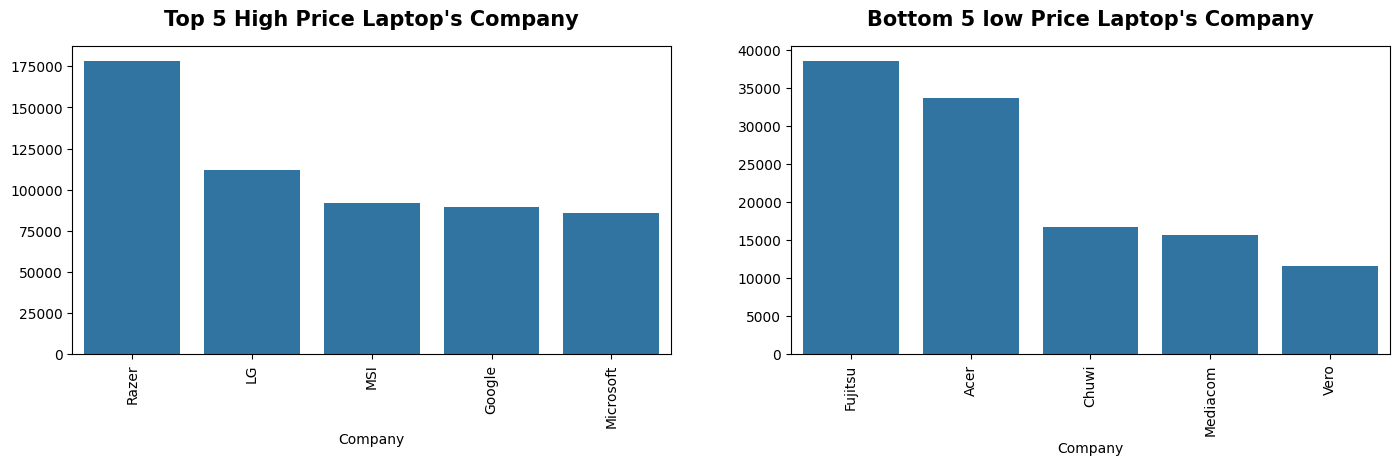

In [41]:
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.barplot(x=top_5.index,y=top_5.values)
plt.title("Top 5 High Price Laptop's Company",fontweight="black",size=15, pad=15)

plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=bottom_5.index,y=bottom_5.values)
plt.title("Bottom 5 low Price Laptop's Company",fontweight="black",size=15, pad=15)

plt.xticks(rotation=90)
plt.show()

### Razer produces the most expensive laptops while companies like Veto produce less expensive laptops.

### We will group together the numerical attributes and then find the correlation between them and 'Price'.

In [42]:
df_numeric=df.select_dtypes(exclude="object")
df_numeric

,Inches,Ram,Weight,Price,CPU_Speed
0,13.3,8,1.37,71378.6832,2.3
1,13.3,8,1.34,47895.5232,1.8
2,15.6,8,1.86,30636.0000,2.5
3,15.4,16,1.83,135195.3360,2.7
4,13.3,8,1.37,96095.8080,3.1
...,...,...,...,...,...
1269,15.6,4,2.20,38378.6496,2.5
1270,14.0,4,1.80,33992.6400,2.5
1271,13.3,16,1.30,79866.7200,2.5
1272,14.0,2,1.50,12201.1200,1.6


In [43]:
df_numeric.corr()["Price"].reset_index().rename(columns={"index":"Numeric_Features","Price":"correlation"})

,Numeric_Features,correlation
0,Inches,0.042767
1,Ram,0.681922
2,Weight,0.173457
3,Price,1.000000
4,CPU_Speed,0.426769


### We observe that CPU_Speed and RAM have a relatively high-positive correlation with Price. This is obvious as faster laptops do require more production cost. Weight and Screen Size have a weak correlation with the 'Price', this may imply that consumers do not particularly consider the size of the screen as much as the other features. Now, we will plot the scatterplot of all these features with the Price to visualise this.

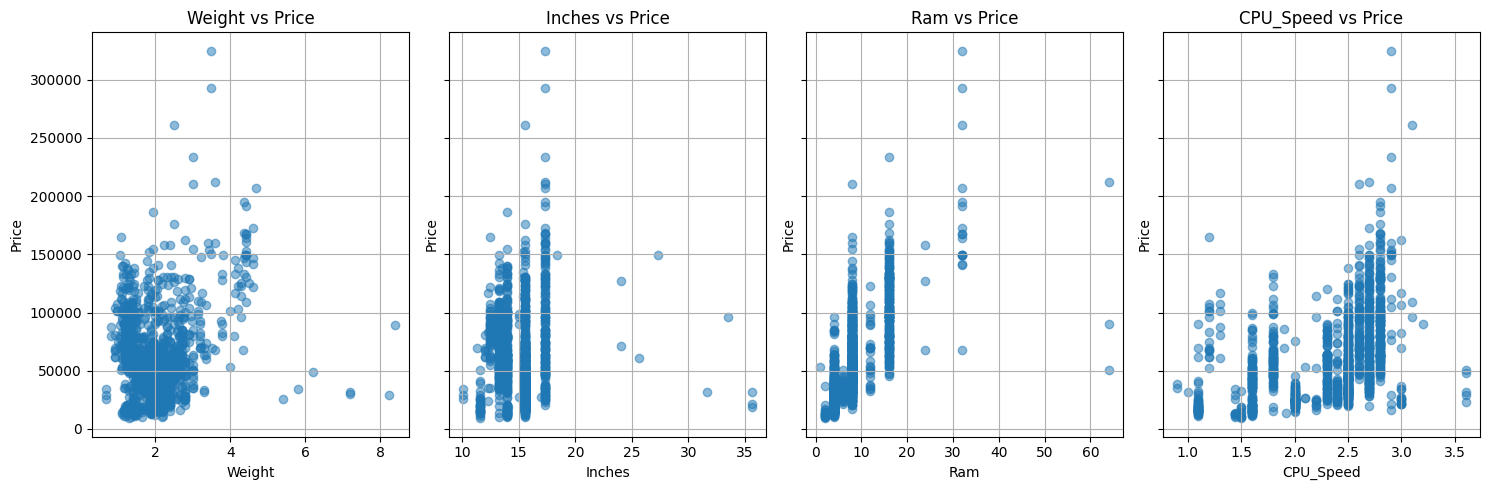

In [44]:
numeric_columns = ['Weight', 'Inches','Ram','CPU_Speed', 'Price']  

num_plots = len(numeric_columns) - 1 

fig, axes = plt.subplots(1, num_plots, figsize=(15, 5), sharey=True)

for i, column in enumerate(numeric_columns[:-1]): 
    axes[i].scatter(df[column], df['Price'], alpha=0.5)
    axes[i].set_title(f'{column} vs Price')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')
    axes[i].grid(True)


plt.tight_layout()
plt.show()

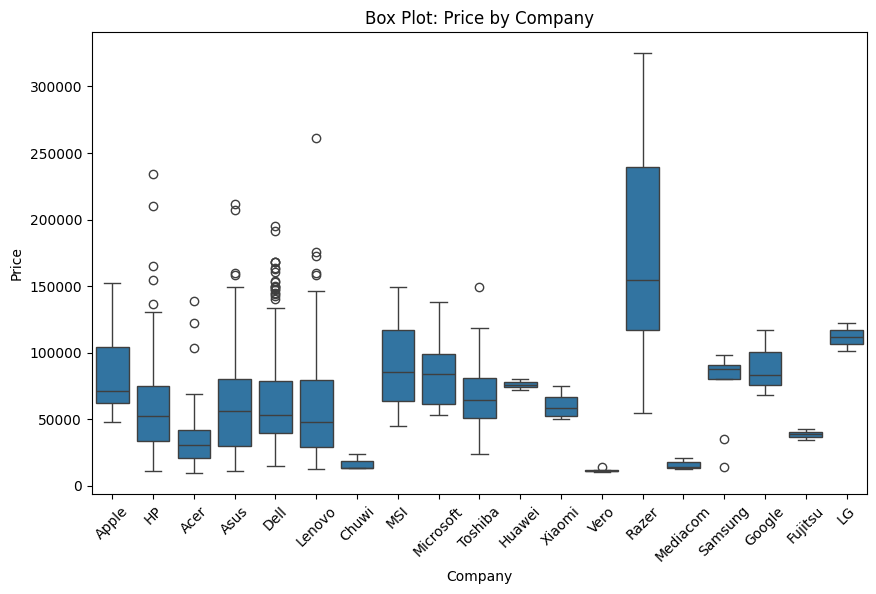

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Price', data=df)
plt.title('Box Plot: Price by Company')
plt.xticks(rotation=45)
plt.show()

### These are the boxplots for prices for each company. We can understand whether the prices for each company are normally distributed or skewed and the presence of outliers can also be studied. HP Laptops prices are almost normally distributed with the presence of outliers. Apple laptop prices are observed to be skewed.

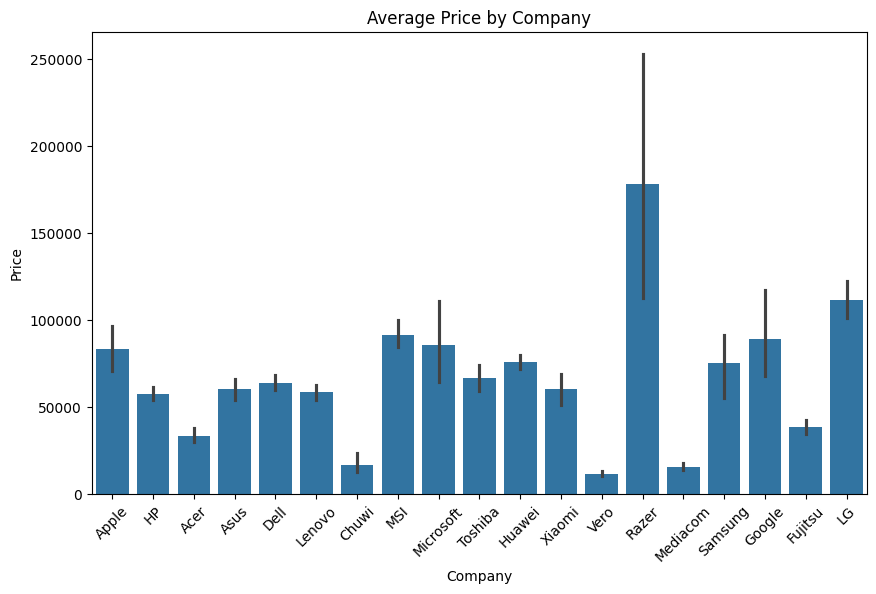

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Price', data=df, estimator='mean')
plt.title('Average Price by Company')
plt.xticks(rotation=45)
plt.show()

### We can observe the mean prices for each company along with the deviation with this bar plot.

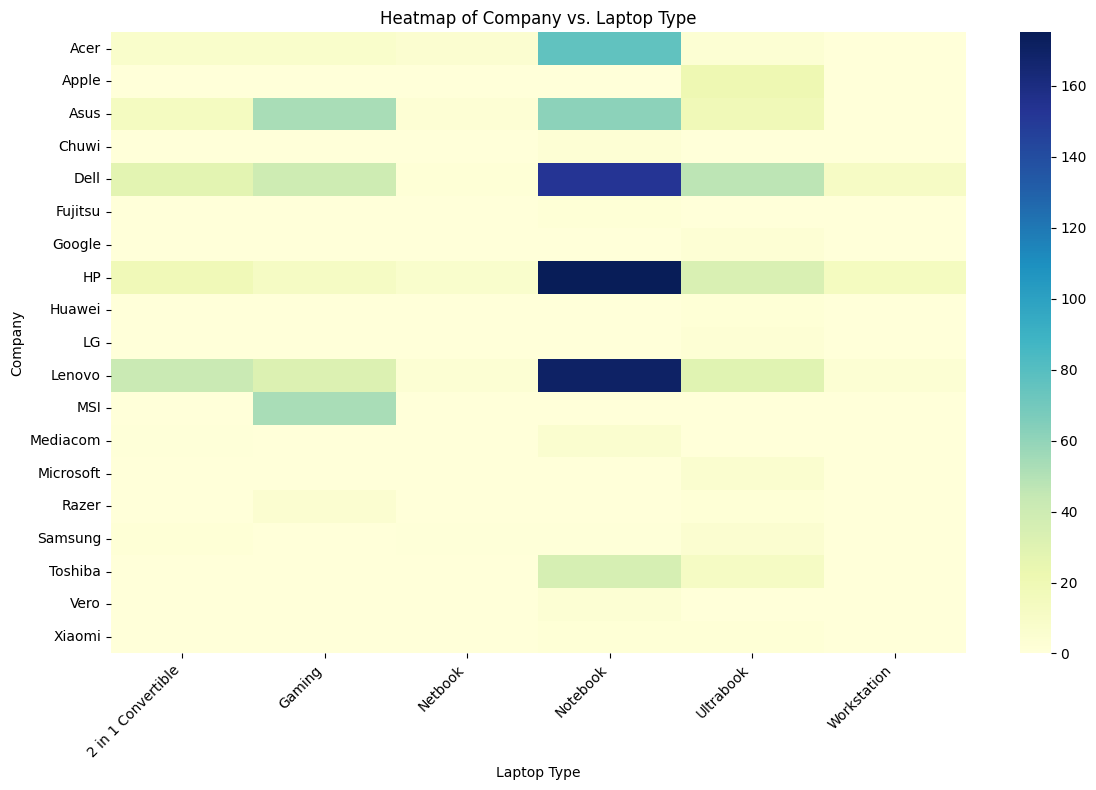

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

company_cpu_crosstab = pd.crosstab(df['Company'], df['TypeName'])

plt.figure(figsize=(12, 8))

sns.heatmap(company_cpu_crosstab, cmap='YlGnBu', annot=False, cbar=True)

plt.title('Heatmap of Company vs. Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('Company')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Heat-Map is drawn between the features Company and Laptop Type after making a cross-tabulation between them. We can observe the variation in notebook types. At first glance, Lenovo and HP mostly produce Notebooks while companies like MSI and ASUS also produce Gaming Laptops.

In [48]:
contingency_table = pd.crosstab(df['Company'], df['CPU_Brand'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 177.5542130980285
p-value: 1.2751805453848568e-20
Degrees of Freedom: 36


### We have performed chi-square test to determine the association between the variables 'Company' and 'CPU_Brand'. The p-value is very close to zero, which implies that the asssociation between these two features is statistically significant.

In [49]:
gaming_prices = df[df['TypeName'] == 'Gaming']['Price']
ultrabook_prices = df[df['TypeName'] == 'Ultrabook']['Price']


mean_gaming = np.mean(gaming_prices)
mean_ultrabook = np.mean(ultrabook_prices)
std_gaming = np.std(gaming_prices, ddof=1)  
std_ultrabook = np.std(ultrabook_prices, ddof=1)  
n_gaming = len(gaming_prices)
n_ultrabook = len(ultrabook_prices)


z_stat = (mean_gaming - mean_ultrabook) / np.sqrt((std_gaming**2 / n_gaming) + (std_ultrabook**2 / n_ultrabook))


p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))


print(f"Comparison: Gaming vs Ultrabook")
print(f"Z-Statistic: {z_stat}")
print(f"p-value: {p_value}")

Comparison: Gaming vs Ultrabook
Z-Statistic: 2.45178845723937
p-value: 0.014214820217105517


### Z-test is performed between the prices of the laptop types 'Gaming' and 'Ultrabook' (both types are considered to be expensive) to check whether the averages of the prices of these two groups are statistically different from each other. The p-value is less than 0.05, therefore the averages of prices of these two laptop types are statistically different.

In [50]:
from scipy.stats import skew

price_skewness = skew(df['Price'])

print(f"Skewness of the Price attribute: {price_skewness}")

Skewness of the Price attribute: 1.518079557866058


### The positive value of the skew variable implies that the 'Price' variable implies that the Price is heavily right-skewed. We cannot simply operate on this data. Therefore, we will apply Box-Cox transformation on the price variable and perform ANOVA test to assess whether the averages of laptop prices of more than two companies are statistically different from each other.

In [51]:

df['Transformed_Price'] = np.nan  


for name, group in df.groupby('Company'):
    if (group['Price'] > 0).all():  
        transformed_data, lambda_value = stats.boxcox(group['Price'])
        df.loc[df['Company'] == name, 'Transformed_Price'] = transformed_data
    else:
        print(f"Cannot apply Box-Cox transformation for {name} due to non-positive values.")

company_groups_transformed = [group['Transformed_Price'].dropna().values for name, group in df.groupby('Company')]


f_stat, p_value = stats.f_oneway(*company_groups_transformed)

print(f"F-Statistic: {f_stat}")
print(f"p-value: {p_value}")

F-Statistic: 245.24191319509538
p-value: 0.0


### The results suggest that at least one company's mean price is significantly different from the others. This is because due to certain companies like Razer which produce significantly expensive laptops. A higher F-statistic indicates that the group means (average prices for different companies) are more different from each other compared to the variability within each company. Since the p-value is 0.0, which is much smaller than the common significance threshold of 0.05, we can reject the null hypothesis. This means there is strong evidence that the average price of laptops differs significantly across different companies.

# Conclusion:
### Most Demanding Laptops are are produced by the companies 'Lenovo', 'HP' and 'Dell'


### Most Expensive laptops Brands: Razer, LG, MSI, GOOGLE, MICROSOFT
### Typically, Gaming Laptops with Intel as Processor, RAM greater than 8 GB, having NVIDIA GPUR are found to be more expensive.
### Most budgetable laptop Brand: Acer from demanding aspect as well
### Prominent numerical Factors on which Price depends: RAM and CPU Speed
### There is positive relation between Price and Laptop Company, OS, CPU, GPU and Memory.

### If any existing company or any new company wishes to increase its demand and market share, then it should focus on improving its configurations like RAM, CPU Speed, Memory, Optimized Weight and also the price should be reasonable (upto Rs. 70000)